In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('CarDataML.xlsx')

In [3]:
df

,Location,Brand,Model,Registration Year,Car Age,Fuel Type,Kms Driven,Ownership,Transmission,Seats,Engine Displacement,Mileage,Max_Power,Wheel_Size,Torque,Price
0,Ahmedabad,Audi,Q3 2.0 TDI,2015,8,Diesel,65000,FirstOwner,Automatic,5,1968,15.73,174.33,16,380.00,1725000
1,Ahmedabad,Maruti,Swift VDI,2013,11,Diesel,70598,FirstOwner,Manual,5,1248,22.90,74.00,14,190.00,356000
2,Ahmedabad,Maruti,Swift DDiS VDI,2014,9,Diesel,66000,FirstOwner,Manual,5,1248,28.40,74.00,5,190.00,380000
3,Ahmedabad,Hyundai,Grand i10 1.2 Kappa Sportz BSIV,2017,6,Petrol,47975,SecondOwner,Manual,5,1197,18.90,81.86,5,113.75,496000
4,Ahmedabad,Honda,Brio S MT,2015,8,Petrol,21000,FirstOwner,Manual,5,1198,19.40,86.80,5,109.00,390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,New Delhi,Honda,City ZX CVT,2021,4,Petrol,19000,FirstOwner,Manual,5,1197,18.00,86.70,18,111.70,1450000
4929,New Delhi,Volvo,S60 D5 Inscription,2015,4,Diesel,66503,SecondOwner,Automatic,5,1197,20.36,78.90,19,115.00,1062000
4930,Chennai,Renault,Duster 110PS Diesel RxL,2015,8,Diesel,70000,FirstOwner,Manual,5,2179,21.40,83.10,5,145.00,550000
4931,Gurgaon,Hyundai,i20 1.2 Spotz,2018,1,Petrol,77753,FirstOwner,Manual,5,1591,17.80,117.30,16,113.75,612000


In [4]:
df.dtypes


Location                object
Brand                   object
Model                   object
Registration Year        int64
Car Age                  int64
Fuel Type               object
Kms Driven               int64
Ownership               object
Transmission            object
Seats                    int64
Engine Displacement      int64
Mileage                float64
Max_Power              float64
Wheel_Size               int64
Torque                 float64
Price                    int64
dtype: object

#### Data Preprocessing

In [5]:
cat=[]
num=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat.append(i)
    elif df.dtypes[i]!='object':
        num.append(i)    


In [6]:
cat

['Location', 'Brand', 'Model', 'Fuel Type', 'Ownership', 'Transmission']

In [7]:
num

['Registration Year',
 'Car Age',
 'Kms Driven',
 'Seats',
 'Engine Displacement',
 'Mileage',
 'Max_Power',
 'Wheel_Size',
 'Torque',
 'Price']

Registration Year          AxesSubplot(0.125,0.71587;0.227941x0.16413)
Car Age                 AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Kms Driven              AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Seats                     AxesSubplot(0.125,0.518913;0.227941x0.16413)
Engine Displacement    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Mileage                AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Max_Power                 AxesSubplot(0.125,0.321957;0.227941x0.16413)
Wheel_Size             AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Torque                 AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Price                        AxesSubplot(0.125,0.125;0.227941x0.16413)
dtype: object

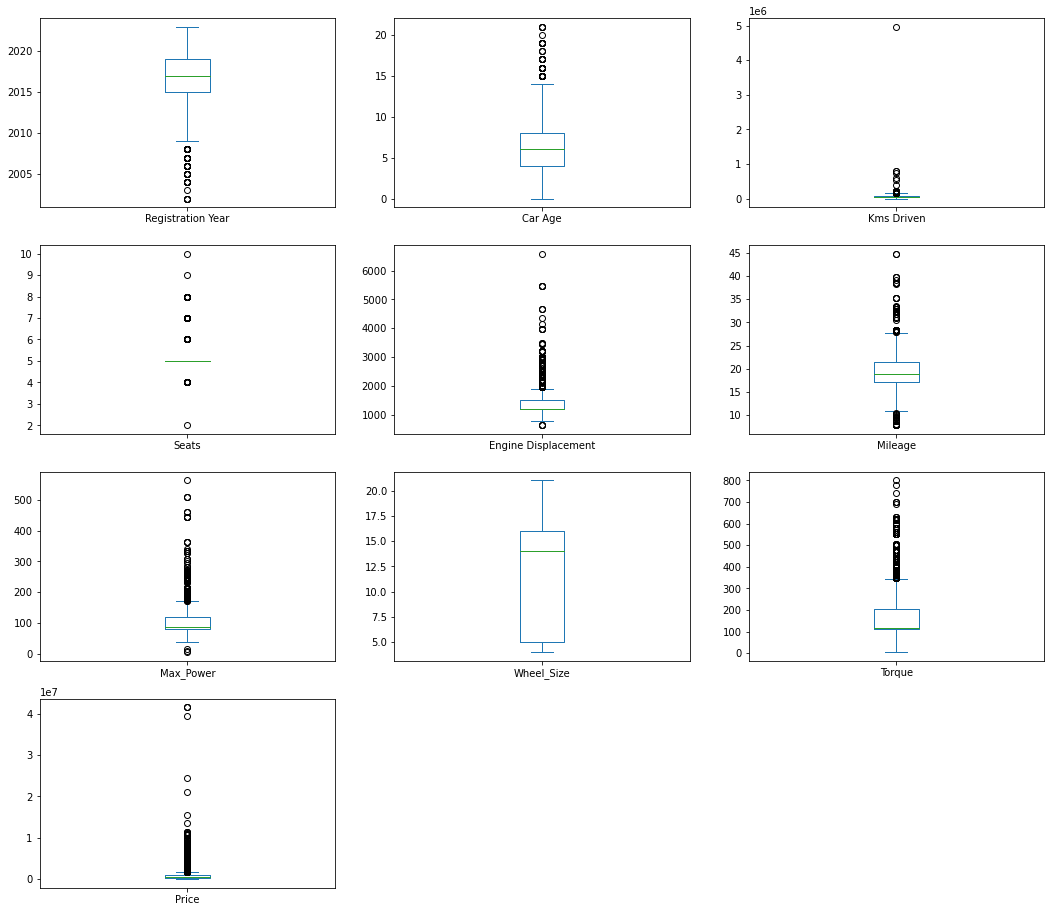

In [8]:
#Checking for the outliers(Numerical)
df[num].plot(kind='box',subplots=True,layout=(4,3),figsize=(18,16))

- **Outliers is present in each column except Wheel_Size.**

In [9]:
num.remove('Price')

In [10]:
num

['Registration Year',
 'Car Age',
 'Kms Driven',
 'Seats',
 'Engine Displacement',
 'Mileage',
 'Max_Power',
 'Wheel_Size',
 'Torque']

In [11]:
#reducing outliers for all the features(num)
from scipy.stats import zscore
z=np.abs(zscore(df[num]))
df=df[(z<3).all(axis=1)]

In [12]:
df

,Location,Brand,Model,Registration Year,Car Age,Fuel Type,Kms Driven,Ownership,Transmission,Seats,Engine Displacement,Mileage,Max_Power,Wheel_Size,Torque,Price
0,Ahmedabad,Audi,Q3 2.0 TDI,2015,8,Diesel,65000,FirstOwner,Automatic,5,1968,15.73,174.33,16,380.00,1725000
1,Ahmedabad,Maruti,Swift VDI,2013,11,Diesel,70598,FirstOwner,Manual,5,1248,22.90,74.00,14,190.00,356000
2,Ahmedabad,Maruti,Swift DDiS VDI,2014,9,Diesel,66000,FirstOwner,Manual,5,1248,28.40,74.00,5,190.00,380000
3,Ahmedabad,Hyundai,Grand i10 1.2 Kappa Sportz BSIV,2017,6,Petrol,47975,SecondOwner,Manual,5,1197,18.90,81.86,5,113.75,496000
4,Ahmedabad,Honda,Brio S MT,2015,8,Petrol,21000,FirstOwner,Manual,5,1198,19.40,86.80,5,109.00,390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,New Delhi,Honda,City ZX CVT,2021,4,Petrol,19000,FirstOwner,Manual,5,1197,18.00,86.70,18,111.70,1450000
4929,New Delhi,Volvo,S60 D5 Inscription,2015,4,Diesel,66503,SecondOwner,Automatic,5,1197,20.36,78.90,19,115.00,1062000
4930,Chennai,Renault,Duster 110PS Diesel RxL,2015,8,Diesel,70000,FirstOwner,Manual,5,2179,21.40,83.10,5,145.00,550000
4931,Gurgaon,Hyundai,i20 1.2 Spotz,2018,1,Petrol,77753,FirstOwner,Manual,5,1591,17.80,117.30,16,113.75,612000


In [13]:
#checking for the skewness(numerical)
df[num].skew()

Registration Year     -0.449342
Car Age                0.434794
Kms Driven             0.652984
Seats                  2.538747
Engine Displacement    1.365990
Mileage                0.031855
Max_Power              1.377843
Wheel_Size            -0.305589
Torque                 1.283038
dtype: float64

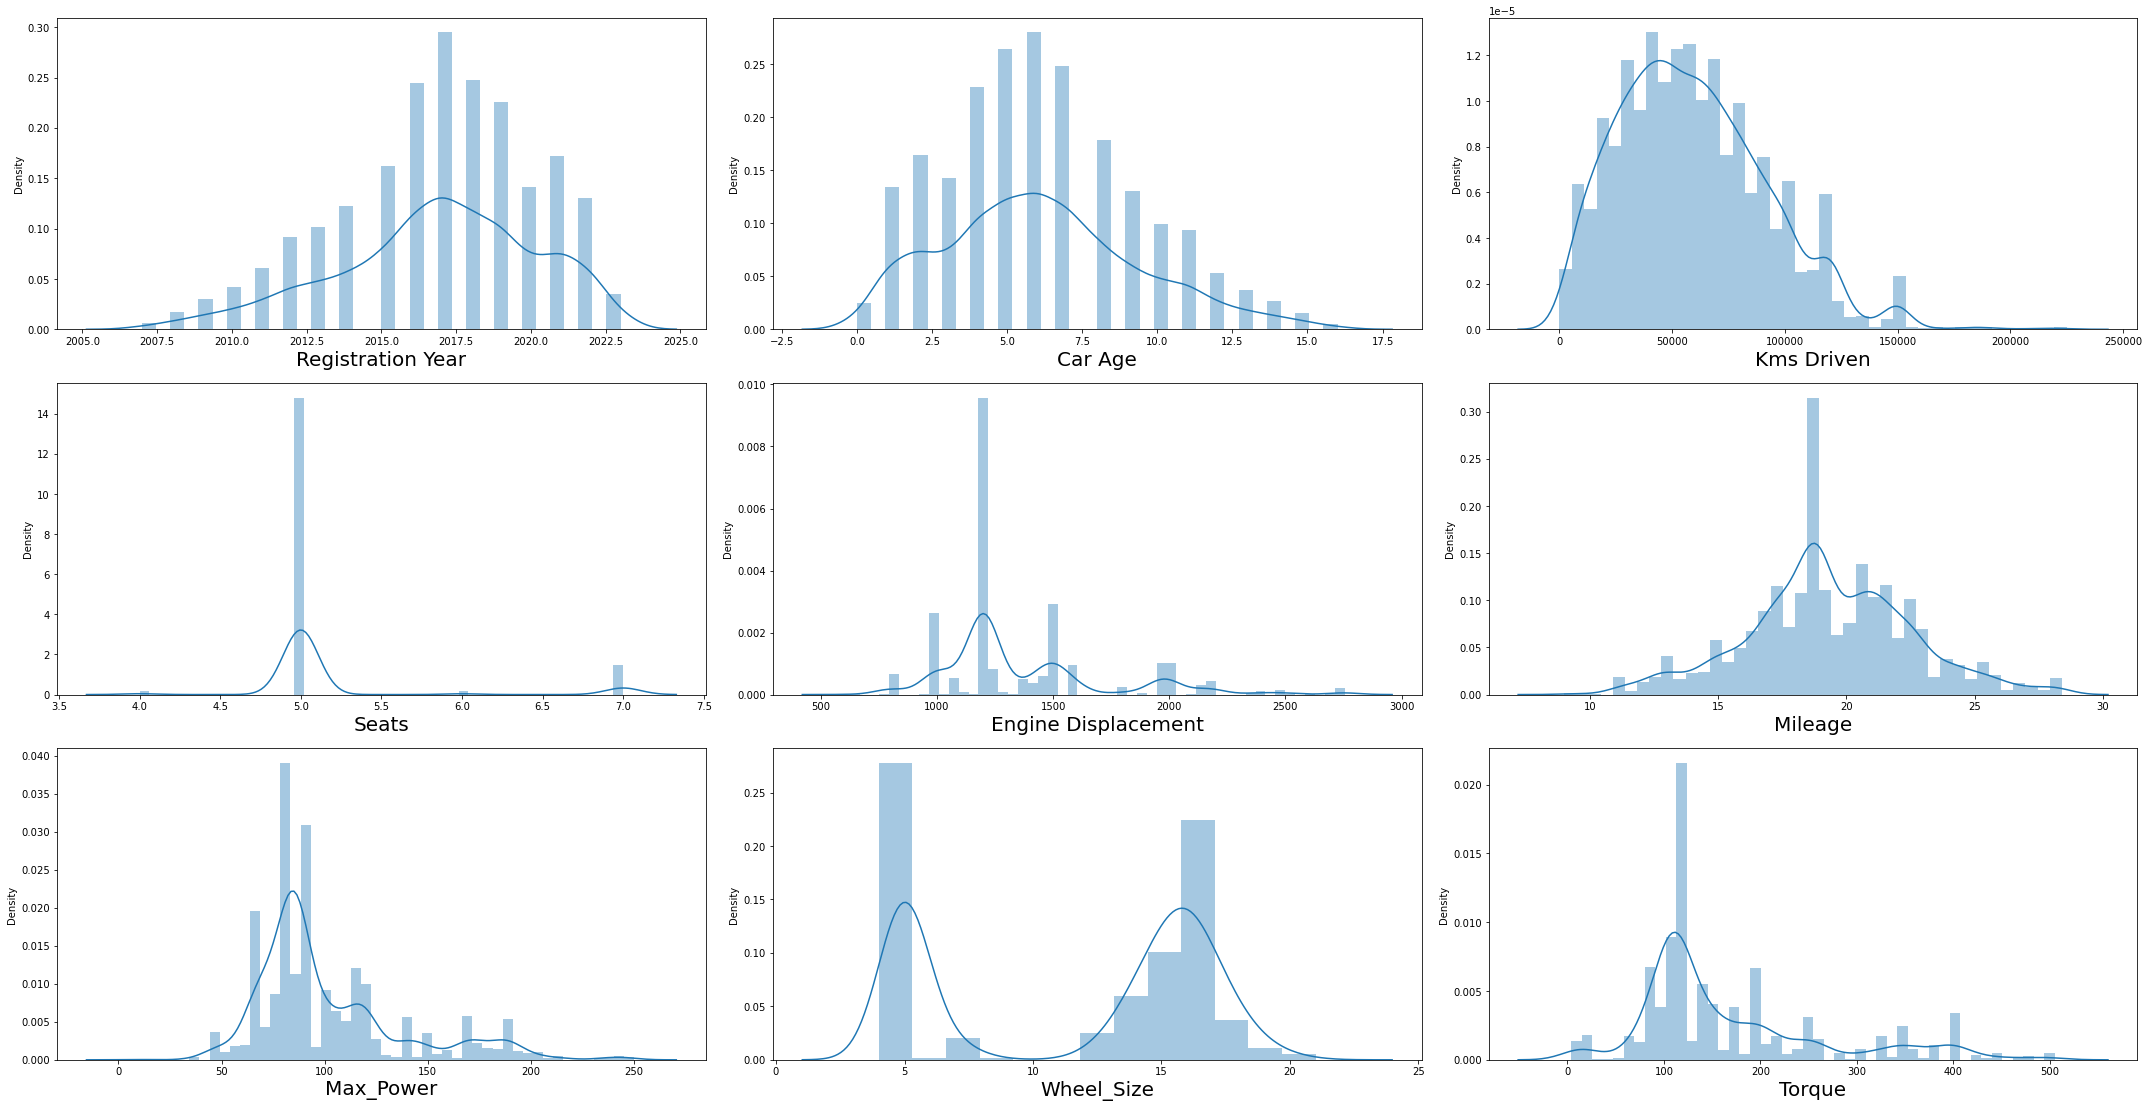

In [14]:
# checking for the distribution (Numerical)
plt.figure(figsize = (30,20))
plotnumber = 1
for column in df[num]:
    if plotnumber <=10:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

#### Observation 
- **From above graph,skewness is prenset in each column.**

In [15]:
#removing skewness from all the numerical features
pt=PowerTransformer()
df[num]=pt.fit_transform(df[num].values)

In [16]:
df[num].skew()

Registration Year     -0.270714
Car Age               -0.049708
Kms Driven            -0.058149
Seats                 -0.907602
Engine Displacement   -0.020190
Mileage                0.011304
Max_Power             -0.067619
Wheel_Size            -0.306994
Torque                 0.096155
dtype: float64

In [17]:
#Encoding Categorical data
le=LabelEncoder()
for i in cat:
    df[i]= le.fit_transform(df[i])
   

In [18]:
df

,Location,Brand,Model,Registration Year,Car Age,Fuel Type,Kms Driven,Ownership,Transmission,Seats,Engine Displacement,Mileage,Max_Power,Wheel_Size,Torque,Price
0,0,1,976,-0.597531,0.639284,1,0.296977,1,0,-0.193336,1.528122,-1.110828,1.765223,0.824878,1.852835,1725000
1,0,18,1233,-1.165373,1.405741,1,0.451806,1,1,-0.193336,-0.154682,1.111392,-0.784286,0.451738,0.417052,356000
2,0,18,1195,-0.884687,0.905088,1,0.325055,1,1,-0.193336,-0.154682,2.798390,-0.784286,-1.236092,0.417052,380000
3,0,9,654,-0.003218,0.067869,4,-0.214662,3,1,-0.193336,-0.346860,-0.124637,-0.465181,-1.236092,-0.438655,496000
4,0,8,221,-0.597531,0.639284,4,-1.238206,1,1,-0.193336,-0.342942,0.030345,-0.282295,-1.236092,-0.502961,390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,7,8,330,1.269695,-0.576386,4,-1.333157,1,1,-0.193336,-0.346860,-0.403980,-0.285876,1.197516,-0.466193,1450000
4929,7,29,1060,-0.597531,-0.576386,1,0.339108,3,0,-0.193336,-0.346860,0.327513,-0.581010,1.383664,-0.422019,1062000
4930,2,23,435,-0.597531,0.639284,1,0.435532,1,1,-0.193336,1.817645,0.648875,-0.418093,-1.236092,-0.053351,550000
4931,5,9,1601,0.304239,-1.803662,4,0.641993,1,1,-0.193336,0.829094,-0.466123,0.630718,0.824878,-0.438655,612000


In [19]:
#Correlation
df.corr()

,Location,Brand,Model,Registration Year,Car Age,Fuel Type,Kms Driven,Ownership,Transmission,Seats,Engine Displacement,Mileage,Max_Power,Wheel_Size,Torque,Price
Location,1.000000,-0.076424,-0.044278,0.066168,-0.038652,-0.052471,-0.103861,-0.047564,-0.094850,0.003466,0.097396,-0.090080,0.128981,0.073004,0.090233,0.235909
Brand,-0.076424,1.000000,0.045336,0.108187,-0.003307,0.001420,-0.014602,0.005383,0.028005,-0.029864,0.002981,0.056664,-0.046567,-0.004159,-0.015406,-0.033167
Model,-0.044278,0.045336,1.000000,-0.079626,-0.005494,-0.022671,0.035750,0.031458,0.014896,0.013929,0.004592,0.021739,-0.025584,0.014761,-0.026788,-0.064361
Registration Year,0.066168,0.108187,-0.079626,1.000000,-0.018674,0.025134,-0.574612,-0.288078,-0.029522,0.003245,-0.026045,-0.019183,0.004218,0.009180,0.031352,0.264636
Car Age,-0.038652,-0.003307,-0.005494,-0.018674,1.000000,0.004687,0.030581,0.010306,0.009536,0.011010,0.021827,-0.015286,0.002357,0.001632,0.008613,-0.000622
Fuel Type,-0.052471,0.001420,-0.022671,0.025134,0.004687,1.000000,-0.229908,-0.004189,0.006822,0.004324,-0.036568,-0.031683,0.007699,-0.018036,-0.011688,-0.185899
Kms Driven,-0.103861,-0.014602,0.035750,-0.574612,0.030581,-0.229908,1.000000,0.209558,0.048993,-0.006533,0.052363,0.018529,-0.014128,0.005053,-0.039058,-0.229428
Ownership,-0.047564,0.005383,0.031458,-0.288078,0.010306,-0.004189,0.209558,1.000000,0.015078,-0.009191,-0.011445,0.007822,-0.015879,-0.000929,-0.012175,-0.067733
Transmission,-0.094850,0.028005,0.014896,-0.029522,0.009536,0.006822,0.048993,0.015078,1.000000,-0.013936,-0.129067,0.050300,-0.077793,-0.032450,-0.045240,-0.044540
Seats,0.003466,-0.029864,0.013929,0.003245,0.011010,0.004324,-0.006533,-0.009191,-0.013936,1.000000,-0.021550,-0.010542,-0.009580,-0.024647,0.011212,0.003680


<AxesSubplot:>

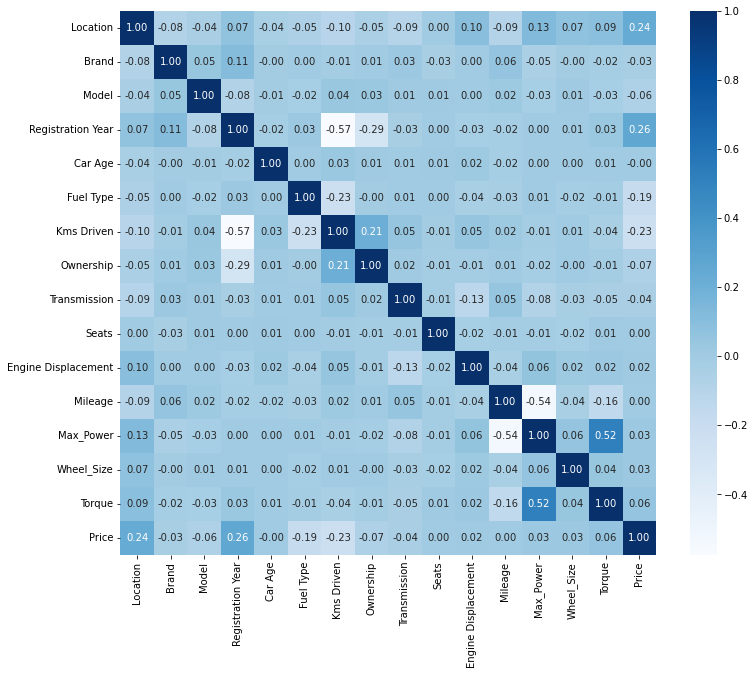

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True,fmt='.2f')

#### Observation:
- **torque and Max_power are hihgly correlated with each other.**
- **Rest of the features are  moderately and  poorly correlated with each other.**

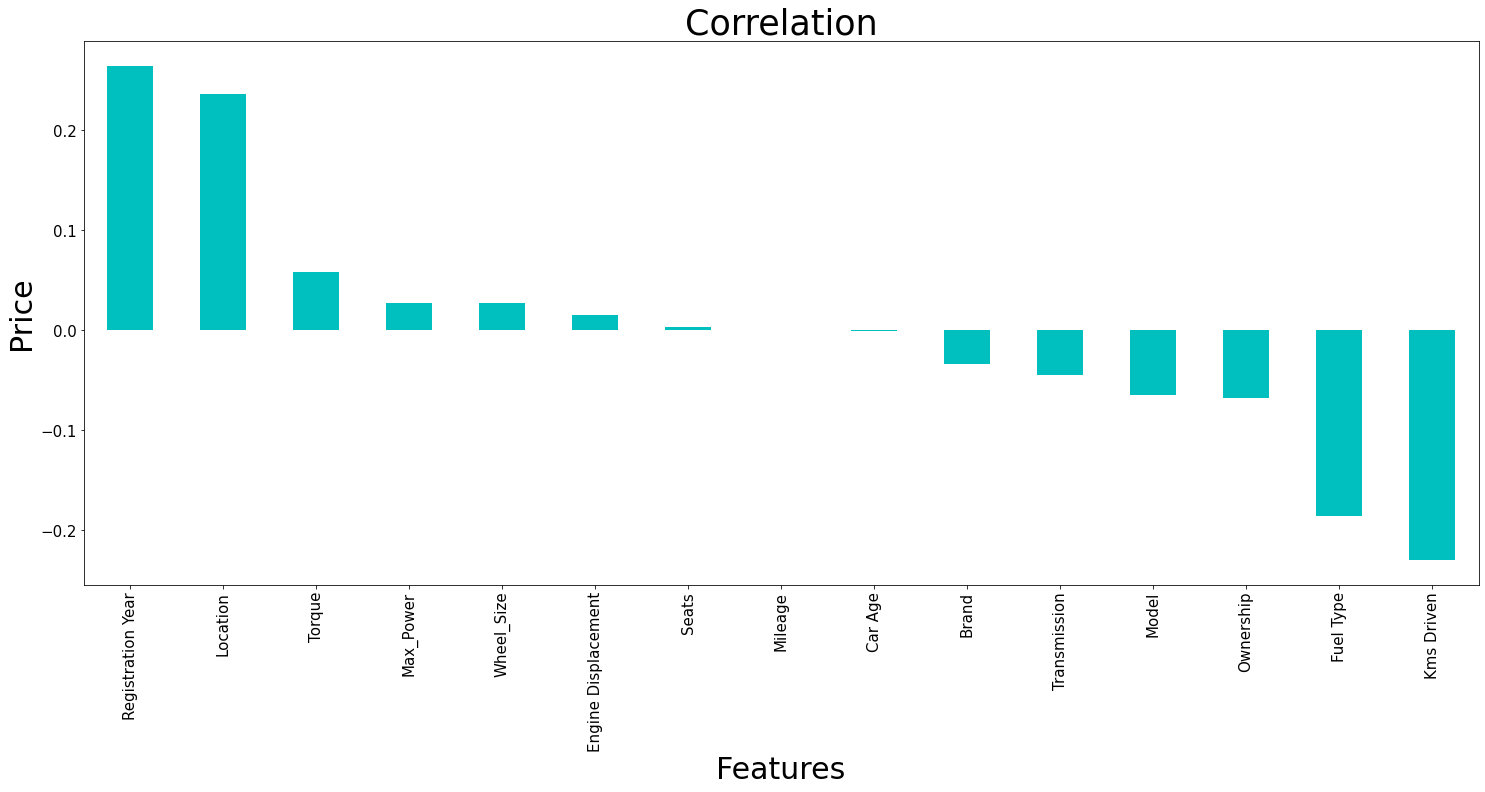

In [21]:
plt.figure(figsize=(25,10))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=30)
plt.ylabel("Price",fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('Correlation',fontsize=35)
plt.show()

#### Observation:
- **Registration year,fuel type,location and Kmsvdriven are highly correlated with target.**
- **Mileage,seats and car age has very less correlation with target.**
- **Rest of the features are moderately and poorly correlated with target**

In [22]:
df.corr()['Price'].sort_values()

Kms Driven            -0.229428
Fuel Type             -0.185899
Ownership             -0.067733
Model                 -0.064361
Transmission          -0.044540
Brand                 -0.033167
Car Age               -0.000622
Mileage                0.000848
Seats                  0.003680
Engine Displacement    0.015596
Wheel_Size             0.026984
Max_Power              0.027528
Torque                 0.058417
Location               0.235909
Registration Year      0.264636
Price                  1.000000
Name: Price, dtype: float64

In [23]:
#dropping cloumns which have less  correlation with target
df.drop(columns=['Car Age','Mileage','Seats'],inplace=True)

In [24]:
df

,Location,Brand,Model,Registration Year,Fuel Type,Kms Driven,Ownership,Transmission,Engine Displacement,Max_Power,Wheel_Size,Torque,Price
0,0,1,976,-0.597531,1,0.296977,1,0,1.528122,1.765223,0.824878,1.852835,1725000
1,0,18,1233,-1.165373,1,0.451806,1,1,-0.154682,-0.784286,0.451738,0.417052,356000
2,0,18,1195,-0.884687,1,0.325055,1,1,-0.154682,-0.784286,-1.236092,0.417052,380000
3,0,9,654,-0.003218,4,-0.214662,3,1,-0.346860,-0.465181,-1.236092,-0.438655,496000
4,0,8,221,-0.597531,4,-1.238206,1,1,-0.342942,-0.282295,-1.236092,-0.502961,390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,7,8,330,1.269695,4,-1.333157,1,1,-0.346860,-0.285876,1.197516,-0.466193,1450000
4929,7,29,1060,-0.597531,1,0.339108,3,0,-0.346860,-0.581010,1.383664,-0.422019,1062000
4930,2,23,435,-0.597531,1,0.435532,1,1,1.817645,-0.418093,-1.236092,-0.053351,550000
4931,5,9,1601,0.304239,4,0.641993,1,1,0.829094,0.630718,0.824878,-0.438655,612000


In [25]:
#splittig the dataset
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:
x

,Location,Brand,Model,Registration Year,Fuel Type,Kms Driven,Ownership,Transmission,Engine Displacement,Max_Power,Wheel_Size,Torque
0,0,1,976,-0.597531,1,0.296977,1,0,1.528122,1.765223,0.824878,1.852835
1,0,18,1233,-1.165373,1,0.451806,1,1,-0.154682,-0.784286,0.451738,0.417052
2,0,18,1195,-0.884687,1,0.325055,1,1,-0.154682,-0.784286,-1.236092,0.417052
3,0,9,654,-0.003218,4,-0.214662,3,1,-0.346860,-0.465181,-1.236092,-0.438655
4,0,8,221,-0.597531,4,-1.238206,1,1,-0.342942,-0.282295,-1.236092,-0.502961
...,...,...,...,...,...,...,...,...,...,...,...,...
4928,7,8,330,1.269695,4,-1.333157,1,1,-0.346860,-0.285876,1.197516,-0.466193
4929,7,29,1060,-0.597531,1,0.339108,3,0,-0.346860,-0.581010,1.383664,-0.422019
4930,2,23,435,-0.597531,1,0.435532,1,1,1.817645,-0.418093,-1.236092,-0.053351
4931,5,9,1601,0.304239,4,0.641993,1,1,0.829094,0.630718,0.824878,-0.438655


In [27]:
y

0       1725000
1        356000
2        380000
3        496000
4        390000
         ...   
4928    1450000
4929    1062000
4930     550000
4931     612000
4932     596000
Name: Price, Length: 4498, dtype: int64

In [28]:
#Checking for the multicoolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
def cal_vif(x):
    vif=pd.DataFrame()
    vif['Features']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return(vif)

In [30]:
cal_vif(x)

,Features,VIF
0,Location,1.913988
1,Brand,4.231168
2,Model,3.219145
3,Registration Year,1.603184
4,Fuel Type,4.314515
5,Kms Driven,1.619577
6,Ownership,3.469454
7,Transmission,3.108816
8,Engine Displacement,1.031364
9,Max_Power,1.390497


#### Observation:
- **There is no multicollinearity between features.**

In [31]:
#Scaling all the features
ss=StandardScaler()
x=ss.fit_transform(x)

In [32]:
x.shape

(4498, 12)

In [33]:
y.shape

(4498,)

In [34]:
x

array([[-1.03175618, -1.88498348,  0.32167257, ...,  1.76522256,
         0.82487777,  1.8528347 ],
       [-1.03175618,  0.47281844,  0.83666605, ..., -0.78428582,
         0.45173818,  0.41705243],
       [-1.03175618,  0.47281844,  0.76051915, ..., -0.78428582,
        -1.23609222,  0.41705243],
       ...,
       [-0.1008888 ,  1.16628959, -0.76241877, ..., -0.41809325,
        -1.23609222, -0.05335056],
       [ 1.29541225, -0.77542964,  1.57408862, ...,  0.63071779,
         0.82487777, -0.43865513],
       [ 2.69171331,  0.47281844, -1.26338519, ..., -0.46518095,
         0.63837449, -0.48927624]])

In [35]:
y

0       1725000
1        356000
2        380000
3        496000
4        390000
         ...   
4928    1450000
4929    1062000
4930     550000
4931     612000
4932     596000
Name: Price, Length: 4498, dtype: int64

In [36]:
#finding best random state
max_accu=0
max_rs=0
rfr=RandomForestRegressor()
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    rfr.fit(x_train, y_train)
    pred = rfr.predict(x_test)
    accu=r2_score(y_test,pred)
    if accu>max_accu:
        max_accu=accu
        max_rs=i
print("Best accuracy is ",max_accu," on Random_state ",max_rs)

Best accuracy is  0.9130747536265356  on Random_state  83


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=83)

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3598, 12)
(3598,)
(900, 12)
(900,)


In [44]:
#Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2score=r2_score(y_test,pred)*100
crossvalscore=cross_val_score(lr,x,y,cv=5).mean()*100
diff=r2score-crossvalscore
print('r2_Score:',r2score)
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean absolute Error:',mean_absolute_error(y_test,pred))
print('Cross Val Score:',crossvalscore)
print('Differenc between r2_Score and Cross Val Score:',diff)

r2_Score: 18.98325320330584
Mean Squared Error: 3033241918539.6816
Mean absolute Error: 683790.8190524062
Cross Val Score: 19.23523728303075
Differenc between r2_Score and Cross Val Score: -0.25198407972490955


In [45]:
#RandomforestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
r2score=r2_score(y_test,pred)*100
crossvalscore=cross_val_score(rfr,x,y,cv=5).mean()*100
diff=r2score-crossvalscore
print('r2_Score:',r2score)
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean absolute Error:',mean_absolute_error(y_test,pred))
print('Cross Val Score:',crossvalscore)
print('Differenc between r2_Score and Cross Val Score:',diff)

r2_Score: 91.75812357891438
Mean Squared Error: 308573301648.30566
Mean absolute Error: 225161.94685555558
Cross Val Score: 35.590987923757446
Differenc between r2_Score and Cross Val Score: 56.16713565515693


In [46]:
#AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred=abr.predict(x_test)
r2score=r2_score(y_test,pred)*100
crossvalscore=cross_val_score(abr,x,y,cv=5).mean()*100
diff=r2score-crossvalscore
print('r2_Score:',r2score)
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean absolute Error:',mean_absolute_error(y_test,pred))
print('Cross Val Score:',crossvalscore)
print('Differenc between r2_Score and Cross Val Score:',diff)

r2_Score: 17.384025168787097
Mean Squared Error: 3093116521055.862
Mean absolute Error: 1478885.050597978
Cross Val Score: -164.85499802233127
Differenc between r2_Score and Cross Val Score: 182.23902319111838


In [47]:
#GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
r2score=r2_score(y_test,pred)*100
crossvalscore=cross_val_score(gbr,x,y,cv=5).mean()*100
diff=r2score-crossvalscore
print('r2_Score:',r2score)
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean absolute Error:',mean_absolute_error(y_test,pred))
print('Cross Val Score:',crossvalscore)
print('Differenc between r2_Score and Cross Val Score:',diff)

r2_Score: 86.10125606170709
Mean Squared Error: 520364670214.0796
Mean absolute Error: 318170.7143300438
Cross Val Score: 47.86663191657789
Differenc between r2_Score and Cross Val Score: 38.2346241451292


In [48]:
#SVR
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
r2score=r2_score(y_test,pred)*100
crossvalscore=cross_val_score(svr,x,y,cv=5).mean()*100
diff=r2score-crossvalscore
print('r2_Score:',r2score)
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean absolute Error:',mean_absolute_error(y_test,pred))
print('Cross Val Score:',crossvalscore)
print('Differenc between r2_Score and Cross Val Score:',diff)

r2_Score: -4.926448498567515
Mean Squared Error: 3928413748184.921
Mean absolute Error: 642413.1770479195
Cross Val Score: -7.670497250360819
Differenc between r2_Score and Cross Val Score: 2.7440487517933043


In [49]:
#KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
r2score=r2_score(y_test,pred)*100
crossvalscore=cross_val_score(knr,x,y,cv=5).mean()*100
diff=r2score-crossvalscore
print('r2_Score:',r2score)
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean absolute Error:',mean_absolute_error(y_test,pred))
print('Cross Val Score:',crossvalscore)
print('Differenc between r2_Score and Cross Val Score:',diff)

r2_Score: 30.415915223815983
Mean Squared Error: 2605206591866.6665
Mean absolute Error: 575014.8888888889
Cross Val Score: 22.169730930592955
Differenc between r2_Score and Cross Val Score: 8.246184293223028


In [50]:
#DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
r2score=r2_score(y_test,pred)*100
crossvalscore=cross_val_score(dtr,x,y,cv=5).mean()*100
diff=r2score-crossvalscore
print('r2_Score:',r2score)
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean absolute Error:',mean_absolute_error(y_test,pred))
print('Cross Val Score:',crossvalscore)
print('Differenc between r2_Score and Cross Val Score:',diff)


r2_Score: 91.67163320572482
Mean Squared Error: 311811474444.44446
Mean absolute Error: 223218.88888888888
Cross Val Score: -120.09067052197864
Differenc between r2_Score and Cross Val Score: 211.76230372770345


- **Selecting RFR model having r2_score 91.7 an CVscore 56.**

In [102]:
#Hyperparameter Tunning on RFR
from sklearn.model_selection import RandomizedSearchCV
param={'n_estimators': [10,20,30,40,50,60,70,80,90,100],
       'criterion':['squared_error','absolute_error','friedman_mse','poisson'],
       'max_depth': [None,1,2,3,4,5,6,7,8,9],
       'min_samples_split': [1,2,3,4,5,6,7,8,9],
       'min_samples_leaf': [1,2,3,4,5,6,7,8,9],
       'max_features': [None, 'sqrt', 'log2']}

rscv=RandomizedSearchCV(estimator=rfr,param_distributions=param,cv=5)
rscv.fit(x_train,y_train)
       

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='poisson',
                                                   max_features=None,
                                                   min_samples_leaf=2,
                                                   min_samples_split=3,
                                                   n_estimators=50),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [103]:
rscv.best_params_

{'n_estimators': 40,
 'min_samples_split': 9,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'squared_error'}

In [125]:
#tunning RFR with best params
rfr=RandomForestRegressor(n_estimators=40,min_samples_split=2,min_samples_leaf=1,
                         max_features=None,max_depth=None,criterion='poisson')
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
r2score=r2_score(y_test,pred)*100
crossvalscore=cross_val_score(rfr,x,y,cv=5).mean()*100
print('r2_Score:',r2score)
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean absolute Error:',mean_absolute_error(y_test,pred))
print('Cross Val Score:',crossvalscore)

r2_Score: 91.84556299549772
Mean Squared Error: 305299596961.3135
Mean absolute Error: 221031.99030555555
Cross Val Score: 62.08998153432284


In [126]:
#saving the model
import joblib
joblib.dump(rfr,'RFR.obj')

['RFR.obj']

In [133]:
#loading the model
model=joblib.load('RFR.obj')

In [134]:
#predicting 
prediction=model.predict(x_test)

In [136]:
#Conclusion
df=pd.DataFrame({'Original':y_test,'Predicted':prediction})
df

,Original,Predicted
1789,402000,385075.0
2165,175000,204575.0
3266,2050000,1793925.0
3558,1650000,1122675.0
1719,1300000,1475625.0
...,...,...
371,413000,490150.0
2141,646000,642975.0
454,890000,778375.0
46,501000,799150.0


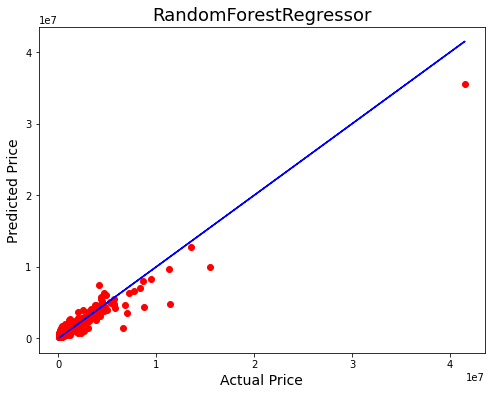

In [141]:
#Actual vs predicted price
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=prediction,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()